In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd
from scipy.fft import fft, ifft, fftshift, fftfreq

In [36]:
# Load data

model_data_dir = '/cnl/data/spate/Res/model_data/'
fcn = 'sine'
radius = 1.2
leak_rate = 0.01
n_hidden = 2**10
n_steps = 4000

states = np.loadtxt(model_data_dir + f"teacher_force_states_{fcn}_n_units_{n_hidden}_sr_{radius}.csv", delimiter=',')
states = states.reshape(-1, n_hidden, n_steps)
states = np.transpose(states, axes=[1, 0, 2]).reshape(n_hidden, -1)

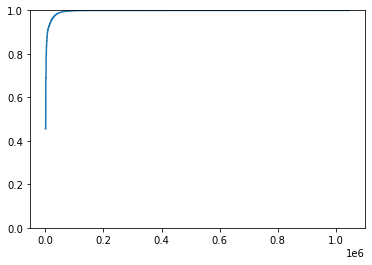

In [37]:
# PLot singular values

u, s, vt = svd(states)
cum_energy = np.cumsum(np.diag(s) / s.sum())
plt.plot(cum_energy)
plt.ylim(0,1)
plt.show()


In [38]:
# Variance in each group of PCs

for i in range(0, 20, 1):
    print(i, np.diag(s)[:i].sum()  / s.sum())

0 0.0
1 0.4548074989756822
2 0.6884111504975722
3 0.7906045616309537
4 0.8354946659376613
5 0.8590897748256464
6 0.878967590881776
7 0.8964117035549887
8 0.9058941119405639
9 0.9118886043015595
10 0.9170646435669517
11 0.9216707389102695
12 0.9256455460634218
13 0.9293888869809253
14 0.9330841110338394
15 0.9367314410803963
16 0.9402219734253102
17 0.9436913106879096
18 0.947046219626261
19 0.9502968492386374


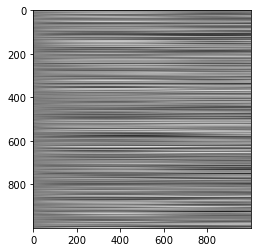

In [41]:
# Raster

plt.imshow(states[:1000, :1000], cmap='gray', vmin=-1, vmax=1)

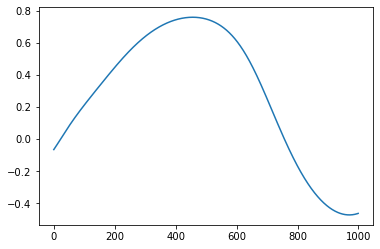

In [61]:
# Single unit

plt.plot(states[5,:1000])

(0.0, 0.01)

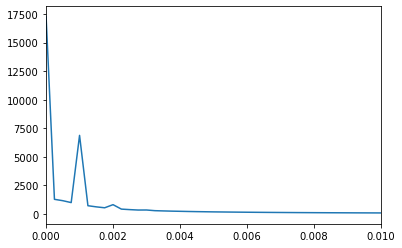

In [56]:
# Fourier analysis

dt = 1
n_samples = 10

ave_spectrum = np.zeros((n_steps,))
for i in range(n_hidden):
    for j in range(n_samples):
        f_hat = fftshift(fft(states[i,j*n_steps:(j+1)*n_steps]))
        ave_spectrum += np.abs(f_hat)

freqs = fftshift(fftfreq(n_steps, dt))
ave_spectrum /= n_hidden

plt.plot(freqs, ave_spectrum)
plt.xlim(0, 0.01)

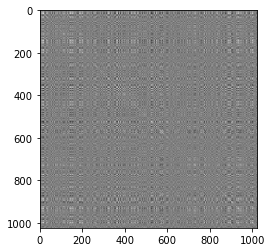

In [64]:
# Stationary correlation matrix

states_mc = states - states.mean(axis=1).reshape(n_hidden, 1)
c = np.corrcoef(states_mc)
plt.imshow(c, cmap='gray', vmin=-1, vmax=1)